## DoctorVisits

In [1]:
install.packages('AER')
install.packages('pscl')
install.packages('ggplot2')
install.packages('faraway')


The downloaded binary packages are in
	/var/folders/m4/mm26w_bd3lj2mk5jv1m251kh0000gn/T//RtmpshjnuU/downloaded_packages

The downloaded binary packages are in
	/var/folders/m4/mm26w_bd3lj2mk5jv1m251kh0000gn/T//RtmpshjnuU/downloaded_packages

The downloaded binary packages are in
	/var/folders/m4/mm26w_bd3lj2mk5jv1m251kh0000gn/T//RtmpshjnuU/downloaded_packages

The downloaded binary packages are in
	/var/folders/m4/mm26w_bd3lj2mk5jv1m251kh0000gn/T//RtmpshjnuU/downloaded_packages


In [2]:
library(AER)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(pscl)
library(knitr)
library(ggplot2)
library(GGally)
library(faraway)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine()

In [3]:
data('DoctorVisits')
head(DoctorVisits)
dim(DoctorVisits)

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no


[1] 5190   12

- ####  변수설명
 - `visits`: 지난 2주간 의사방문 수 
 - `gender` : 성별        
 - `age` : 나이  
 - `income` : 연소득 
 - `illness` : 지난 2주간 질병걸린 사람의 수 
 - `reduced` : 질병이나 부상때문에 지난 2주간 활동이 줄어든 날  
 - `health` : 건강 점수 
 - `private` : 개인건강보험을 들었는지 
 - `freepoor` : 저소득으로 인해 정부의 무료건강보험이 가입되었는지 
 - `freerepat` : 고령으로 인해 정부의 무료건강보험이 가입되었는지  
 - `nchronic` : 활동을 제한하지 않는 만성질병이 있는지 
 - `lchronic` : 활동을 제한하는 만성질병이 있는지 
 
 
- 범주형 변수 : `gender`,`private`,`freepoor`,`freerepat`,`nchronic`,`lchronic`
- 수치형 변수 : `visits`,`age`,`income`,`illness`,`reduced`,`health`

In [6]:
summary(DoctorVisits)

     visits          gender          age             income      
 Min.   :0.0000   male  :2488   Min.   :0.1900   Min.   :0.0000  
 1st Qu.:0.0000   female:2702   1st Qu.:0.2200   1st Qu.:0.2500  
 Median :0.0000                 Median :0.3200   Median :0.5500  
 Mean   :0.3017                 Mean   :0.4064   Mean   :0.5832  
 3rd Qu.:0.0000                 3rd Qu.:0.6200   3rd Qu.:0.9000  
 Max.   :9.0000                 Max.   :0.7200   Max.   :1.5000  
    illness         reduced            health       private    freepoor  
 Min.   :0.000   Min.   : 0.0000   Min.   : 0.000   no :2892   no :4968  
 1st Qu.:0.000   1st Qu.: 0.0000   1st Qu.: 0.000   yes:2298   yes: 222  
 Median :1.000   Median : 0.0000   Median : 0.000                        
 Mean   :1.432   Mean   : 0.8619   Mean   : 1.218                        
 3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.: 2.000                        
 Max.   :5.000   Max.   :14.0000   Max.   :12.000                        
 freerepat  nchronic

- 방문수는 최대가 9인 반면 평균이 0.3 중위값이 0 이기 때문에 0의값이 상당히 많음을 추론해 볼 수 있다.
- 성별은 여자가 약 200명정도 더 많다.
- 나이는 최소가 19 최대 72살이며 평균 40살이다

In [7]:
colSums(is.na(DoctorVisits)) #결측값 없음

visits    gender       age    income   illness   reduced    health   private 
        0         0         0         0         0         0         0         0 
 freepoor freerepat  nchronic  lchronic 
        0         0         0         0

#### `-` 반응변수 visits 탐색

In [8]:
obs.table = tally(group_by(DoctorVisits,visits)) %>%
                mutate(prop=round(n/sum(n),3))
obs.table

visits,n,prop
<dbl>,<int>,<dbl>
0,4141,0.798
1,782,0.151
2,174,0.034
3,30,0.006
4,24,0.005
5,9,0.002
6,12,0.002
7,12,0.002
8,5,0.001


mean,var,max,var/mean
<dbl>,<dbl>,<dbl>,<dbl>
0.3017341,0.6370176,9,2.111189


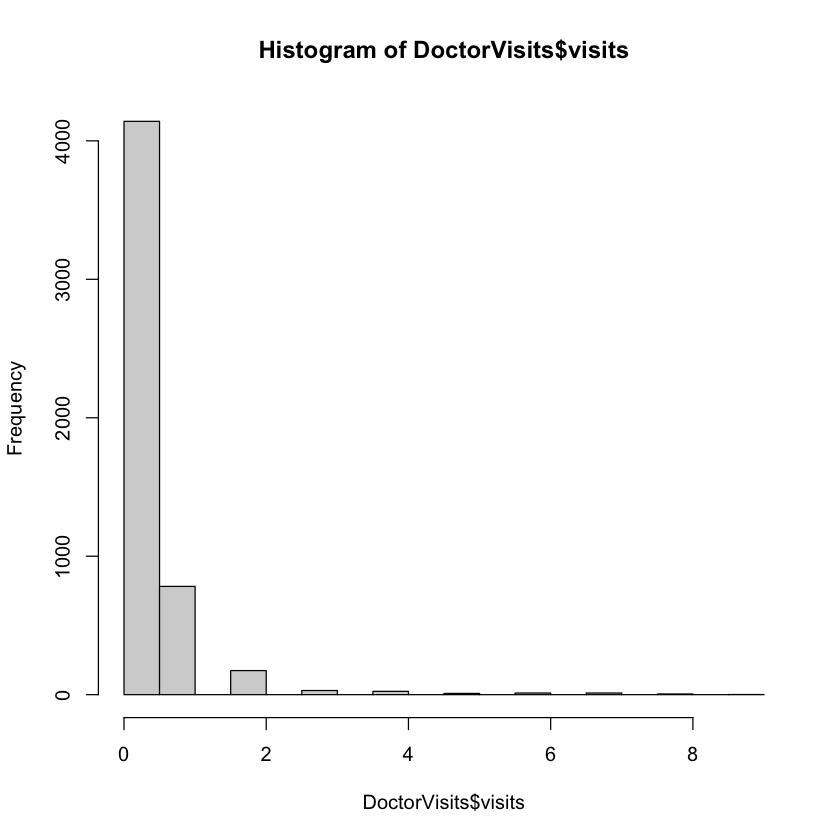

In [9]:
hist(DoctorVisits$visits)

mnmx  <- DoctorVisits %>% summarise(mean = mean(visits),var = var(visits), max = max(visits), var/mean)
mnmx

- 평균 0.3 최대치가 9이다.
- 방문하지 않은 수가 전체의 80%가 된다.
- 한번 방문은 782명으로 15%, 두번 방문은 174명으로 3.4%이다.

$\rightarrow$ 대다수의 사람은 2주동안 병원에 안가는 경우가 굉장히 많다. 

- 범주형 변수 : `gender`,`private`,`freepoor`,`freerepat`,`nchronic`,`lchronic`

In [10]:
DoctorVisits %>% group_by(gender)  %>% 
  summarise(mean=mean(visits), var=var(visits), n=n() ,var/mean, )
        
DoctorVisits  %>% group_by(private)  %>% 
  summarise(mean=mean(visits), var=var(visits), n=n(), var/mean)

DoctorVisits  %>% group_by(freepoor)  %>% 
  summarise(mean=mean(visits), var=var(visits), n=n(), var/mean)

DoctorVisits  %>% group_by(nchronic)  %>% 
  summarise(mean=mean(visits), var=var(visits), n=n(), var/mean)

DoctorVisits  %>% group_by(lchronic)  %>% 
  summarise(mean=mean(visits), var=var(visits), n=n(), var/mean)

gender,mean,var,n,var/mean
<fct>,<dbl>,<dbl>,<int>,<dbl>
male,0.2363344,0.5215261,2488,2.206729
female,0.3619541,0.7360270,2702,2.033482


private,mean,var,n,var/mean
<fct>,<dbl>,<dbl>,<int>,<dbl>
no,0.3073997,0.6695682,2892,2.178168
yes,0.2946040,0.5962356,2298,2.023854


freepoor,mean,var,n,var/mean
<fct>,<dbl>,<dbl>,<int>,<dbl>
no,0.3081723,0.6428807,4968,2.086108
yes,0.1576577,0.4863438,222,3.084809


nchronic,mean,var,n,var/mean
<fct>,<dbl>,<dbl>,<int>,<dbl>
no,0.2721110,0.6153085,3098,2.261240
yes,0.3456023,0.6662504,2092,1.927795


lchronic,mean,var,n,var/mean
<fct>,<dbl>,<dbl>,<int>,<dbl>
no,0.2619411,0.5192864,4585,1.982455
yes,0.6033058,1.4284659,605,2.367731


#### - 수치형 변수 탐색

- 수치형 변수 : `visits`,`age`,`income`,`illness`,`reduced`,`health`

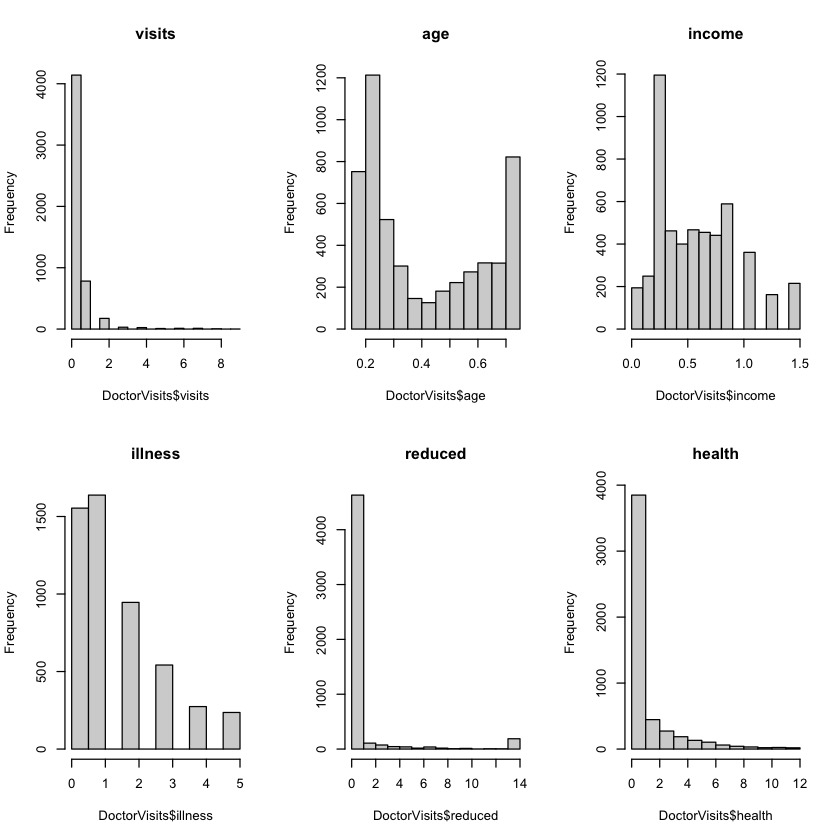

In [11]:
par(mfrow = c(2,3))
hist(DoctorVisits$visits,main = 'visits')
hist(DoctorVisits$age, main = 'age')
hist(DoctorVisits$income,main ='income')
hist(DoctorVisits$illness,main ='illness')
hist(DoctorVisits$reduced,main ='reduced')
hist(DoctorVisits$health,main = 'health')

- 연령대는 유년,청소년층과 고령층이 많으며 중장년층은 적은 모습을 보인다.
- 소득은 0.3정도가 제일 많으며 1.0까지 골고루 분포해 있다.
- 질병에 걸린 사람은 거의 없거나 한명정도가 가장 많음을 보여준다.
- reduced 변수에 0 이 굉장히 많은 것을 보아 일상생활에 영향을 미친 사람이 거의 없음을 보여준다. 다만 14에 있는 사람은 2주 내내 
일상생활을 못한 것을 보아 입원했을 가능성이 있다.
- 건강지수도 0에서 굉장히 높으며 그외엔 굉장히 낮은 모습을 보인다.

In [17]:
library(MASS)
pomod <- polr(factor(visits)~ gender+age+income+illness+reduced+health+private+
                freepoor+freerepat+nchronic+lchronic, data=DoctorVisits)
pomodi <- step(pomod)
summary(step(pomod))

Start:  AIC=6361.51
factor(visits) ~ gender + age + income + illness + reduced + 
    health + private + freepoor + freerepat + nchronic + lchronic

            Df    AIC
- income     1 6360.5
- nchronic   1 6361.2
<none>         6361.5
- age        1 6362.9
- lchronic   1 6363.1
- freerepat  1 6366.3
- private    1 6367.3
- freepoor   1 6368.1
- gender     1 6368.5
- health     1 6372.7
- illness    1 6450.7
- reduced    1 6616.7

Step:  AIC=6360.48
factor(visits) ~ gender + age + illness + reduced + health + 
    private + freepoor + freerepat + nchronic + lchronic

            Df    AIC
- nchronic   1 6360.1
<none>         6360.5
- lchronic   1 6362.0
- age        1 6362.3
- private    1 6365.8
- freepoor   1 6366.3
- freerepat  1 6366.5
- gender     1 6369.2
- health     1 6371.8
- illness    1 6450.9
- reduced    1 6615.0

Step:  AIC=6360.07
factor(visits) ~ gender + age + illness + reduced + health + 
    private + freepoor + freerepat + lchronic

            Df    AIC
<none>    


Re-fitting to get Hessian




Call:
polr(formula = factor(visits) ~ gender + age + illness + reduced + 
    health + private + freepoor + freerepat + lchronic, data = DoctorVisits)

Coefficients:
                Value Std. Error t value
genderfemale  0.26439    0.07888   3.352
age           0.54017    0.23382   2.310
illness       0.27975    0.02690  10.400
reduced       0.17203    0.01072  16.040
health        0.06087    0.01646   3.697
privateyes    0.27097    0.09822   2.759
freepooryes  -0.67465    0.25831  -2.612
freerepatyes  0.38285    0.13348   2.868
lchronicyes   0.15623    0.10605   1.473

Intercepts:
    Value   Std. Error t value
0|1  2.7060  0.1095    24.7031
1|2  4.4757  0.1279    34.9847
2|3  5.6652  0.1561    36.2868
3|4  6.0844  0.1726    35.2592
4|5  6.5978  0.2000    32.9966
5|6  6.8800  0.2191    31.4027
6|7  7.4202  0.2660    27.8966
7|8  8.5433  0.4269    20.0104
8|9 10.3476  1.0079    10.2668

Residual Deviance: 6324.068 
AIC: 6360.068 

In [19]:
mdz = zeroinfl(formula = visits~ gender+ age + illness+ reduced + health + private + freepoor
                + freerepat + lchronic, data = DoctorVisits)
summary(mdz)


Call:
zeroinfl(formula = visits ~ gender + age + illness + reduced + health + 
    private + freepoor + freerepat + lchronic, data = DoctorVisits)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.5714 -0.4467 -0.2877 -0.1892 11.3016 

Count model coefficients (poisson with log link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.726321   0.112225  -6.472 9.67e-11 ***
genderfemale  0.009120   0.069455   0.131   0.8955    
age           0.064377   0.204335   0.315   0.7527    
illness       0.045252   0.024334   1.860   0.0629 .  
reduced       0.082511   0.005993  13.767  < 2e-16 ***
health        0.023541   0.011245   2.093   0.0363 *  
privateyes   -0.039721   0.095653  -0.415   0.6780    
freepooryes  -0.325343   0.237836  -1.368   0.1713    
freerepatyes -0.187080   0.117604  -1.591   0.1117    
lchronicyes   0.021237   0.076951   0.276   0.7826    

Zero-inflation model coefficients (binomial with logit link):
             Estimate Std. Erro

In [22]:
mdz2 = zeroinfl(formula = visits ~ reduced+health | gender + age + illness + reduced + health + private + freerepat, data = DoctorVisits)
summary(mdz2)


Call:
zeroinfl(formula = visits ~ reduced + health | gender + age + illness + 
    reduced + health + private + freerepat, data = DoctorVisits)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.4627 -0.4484 -0.2877 -0.1877 11.7616 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.674720   0.057632 -11.707   <2e-16 ***
reduced      0.083780   0.005828  14.375   <2e-16 ***
health       0.023852   0.010591   2.252   0.0243 *  

Zero-inflation model coefficients (binomial with logit link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.69549    0.18853  14.297  < 2e-16 ***
genderfemale -0.43790    0.13540  -3.234 0.001220 ** 
age          -1.42991    0.40200  -3.557 0.000375 ***
illness      -0.56168    0.07270  -7.726 1.11e-14 ***
reduced      -1.23450    0.23402  -5.275 1.33e-07 ***
health       -0.08755    0.03836  -2.282 0.022476 *  
privateyes   -0.49505    0.15503  -3.193 0.00

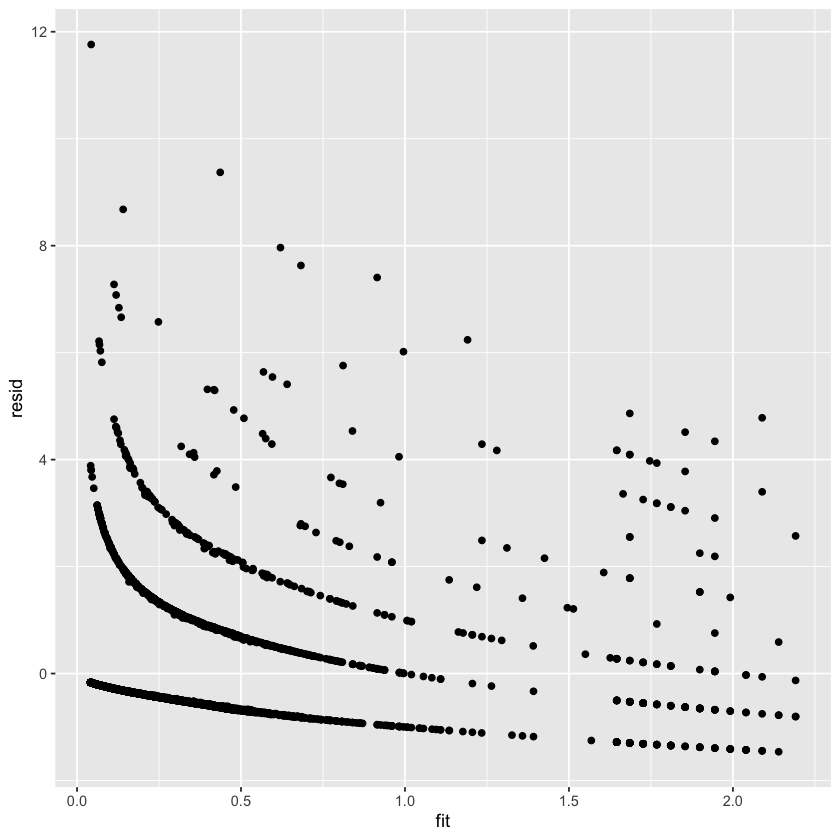

In [23]:
res.df <- data.frame(resid = residuals(mdz2), fit = fitted(mdz2))
ggplot(res.df, aes(x = fit, y = resid)) +
    geom_point()

In [24]:
exp(coef(mdz2))

count_(Intercept)     count_reduced      count_health  zero_(Intercept) 
        0.5092990         1.0873902         1.0241388        14.8128146 
zero_genderfemale          zero_age      zero_illness      zero_reduced 
        0.6453908         0.2393303         0.5702530         0.2909802 
      zero_health   zero_privateyes zero_freerepatyes 
        0.9161724         0.6095388         0.3374161

In [203]:
vuong(mdz,mdz2)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A    p-value
Raw                    1.413338 model1 > model2   0.078778
AIC-corrected         -0.302643 model2 > model1   0.381081
BIC-corrected         -5.926333 model2 > model1 1.5489e-09
